# Logistic regression assignment

# Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’.

If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:


In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Importing all datasets
lead_data = pd.read_csv("E:\dsfw\Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Let's see the head of our master dataset
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Let's check the dimensions of the dataframe
lead_data.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Let's see the type of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Cleaning

In [7]:
lead_data = lead_data.replace('Select', np.nan)

In [8]:
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# Checking the percentage of missing values
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# we will drop the columns having more than 70% NA values.
lead_data = lead_data.drop(lead_data.loc[:,list(round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)>70)].columns, 1)

In [12]:
lead_data['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

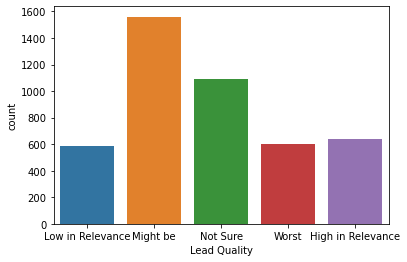

In [13]:
sns.countplot(lead_data['Lead Quality'])

In [14]:
lead_data.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

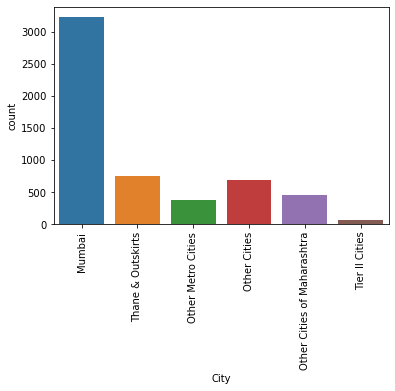

In [15]:
sns.countplot(lead_data.City)
plt.xticks(rotation = 90)

In [17]:
lead_data['City'] = lead_data['City'].replace(np.nan, 'Others')

In [18]:
lead_data["Specialization"].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

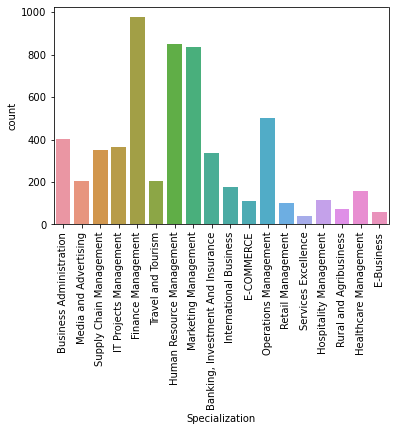

In [19]:
sns.countplot(lead_data.Specialization)
plt.xticks(rotation = 90)

In [20]:
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Others')


In [21]:
lead_data["Tags"].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

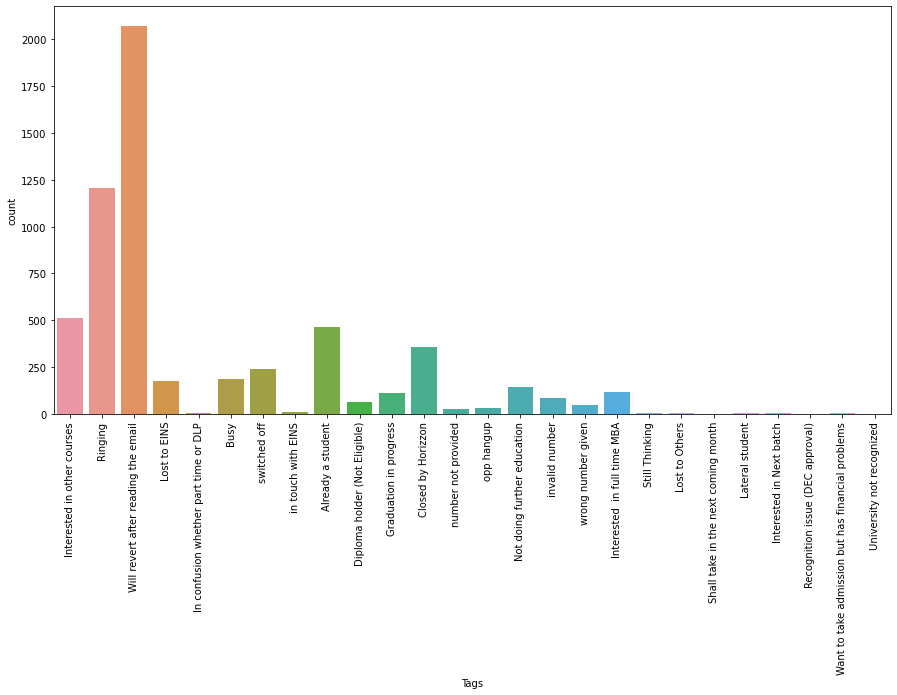

In [22]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(lead_data.Tags)
plt.xticks(rotation = 90)

In [23]:
lead_data['Tags'] = lead_data['Tags'].replace(np.nan, 'Will revert after reading the email')

In [24]:
lead_data['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [25]:
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')


In [26]:
lead_data['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [27]:
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [28]:
lead_data['Country'] = lead_data['Country'].replace(np.nan, 'India')

In [29]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [30]:
lead_data.dropna(inplace = True)

In [31]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [32]:
lead_data.shape

(2377, 35)

# Data Analysis

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

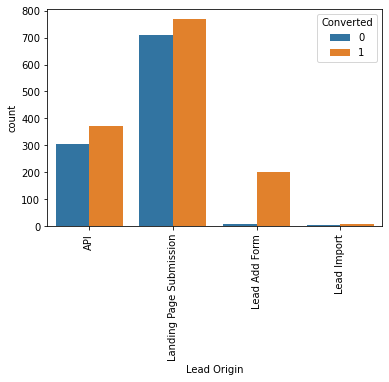

In [33]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

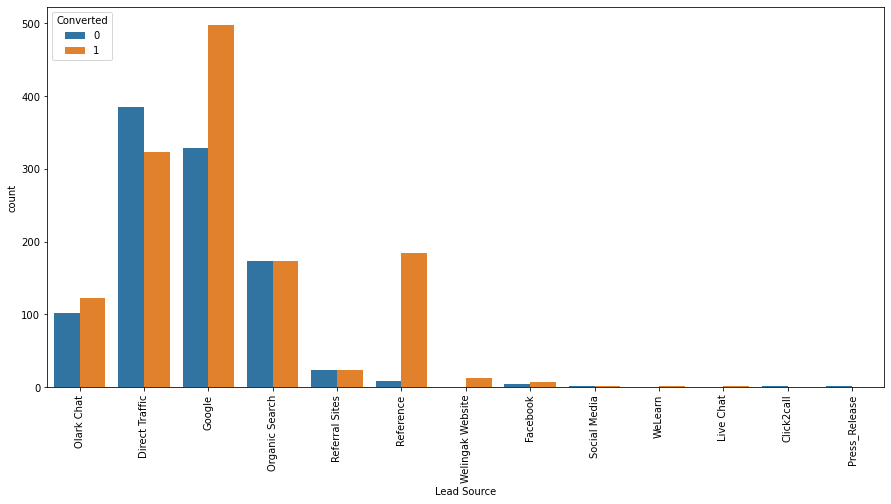

In [34]:
plt.figure(figsize = (15,7))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

In [35]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

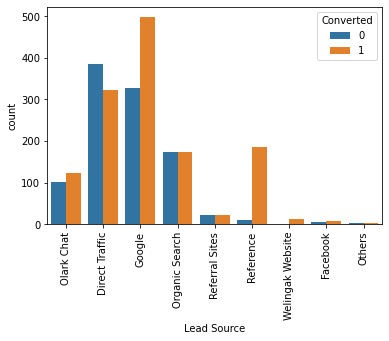

In [36]:
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

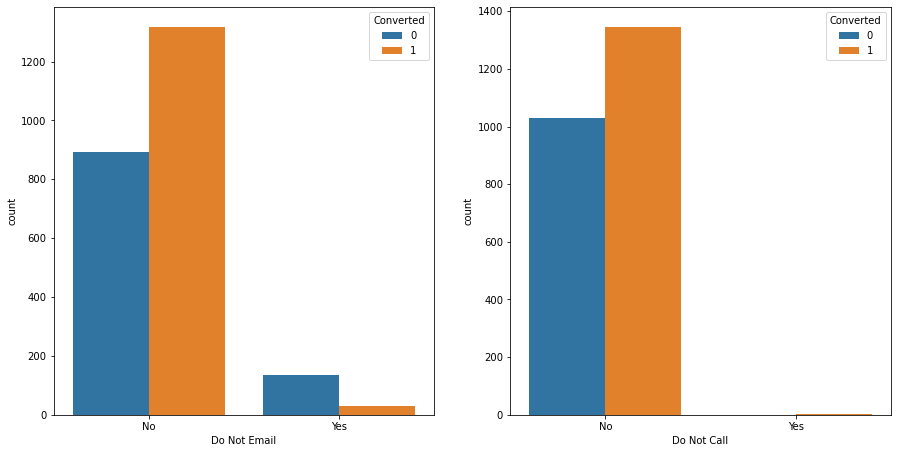

In [37]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_data, ax = axs[1])

In [38]:
lead_data['TotalVisits'].describe(percentiles=[.05,.25, .5, .75, .90, .95, .99])

count    2377.000000
mean        3.972655
std         3.832302
min         0.000000
5%          0.000000
25%         2.000000
50%         3.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        18.240000
max        43.000000
Name: TotalVisits, dtype: float64

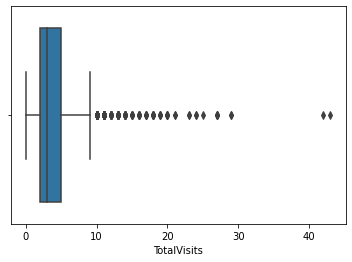

In [39]:
sns.boxplot(lead_data['TotalVisits'])

In [40]:
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][ lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][ lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

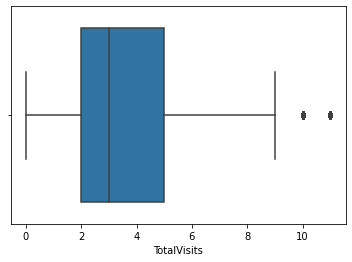

In [41]:
sns.boxplot(lead_data['TotalVisits'])

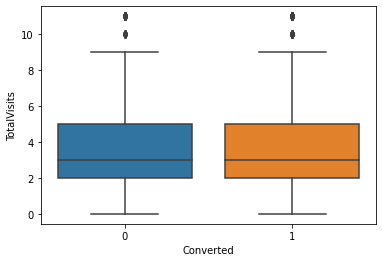

In [42]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data)

In [43]:
lead_data['Total Time Spent on Website'].describe()

count    2377.000000
mean      613.705090
std       579.616968
min         0.000000
25%        77.000000
50%       377.000000
75%      1120.000000
max      2253.000000
Name: Total Time Spent on Website, dtype: float64

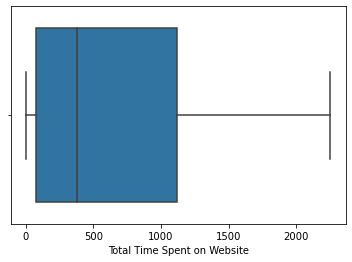

In [44]:
sns.boxplot(lead_data['Total Time Spent on Website'])

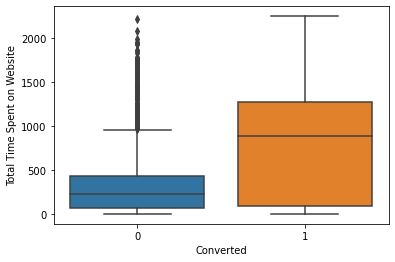

In [45]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data)


In [46]:
lead_data['Page Views Per Visit'].describe()

count    2377.000000
mean        2.667766
std         2.071051
min         0.000000
25%         1.500000
50%         2.000000
75%         4.000000
max        15.000000
Name: Page Views Per Visit, dtype: float64

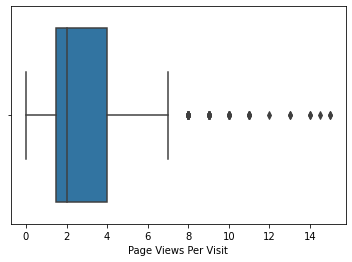

In [47]:
sns.boxplot(lead_data['Page Views Per Visit'])

In [48]:
percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

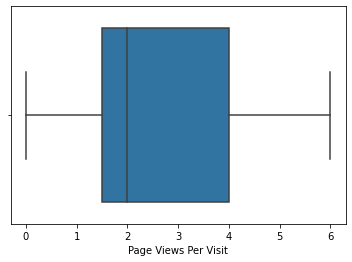

In [49]:
sns.boxplot(lead_data['Page Views Per Visit'])

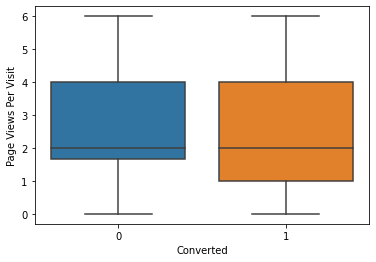

In [50]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_data)

In [51]:
lead_data['Last Activity'].describe()

count             2377
unique              16
top       Email Opened
freq               919
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

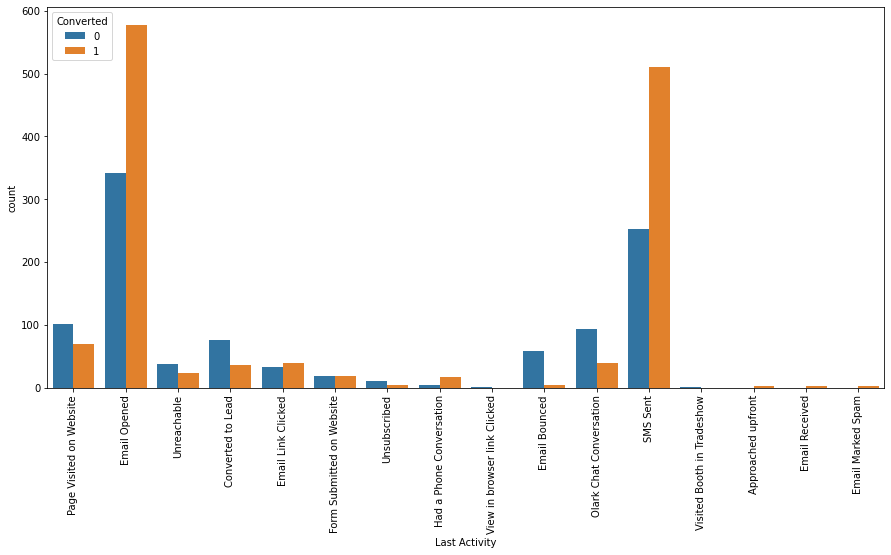

In [52]:
plt.figure(figsize = (15,7))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

In [53]:
lead_data['Last Activity'] =lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
'Visited Booth in Tradeshow', 'Approached upfront','Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

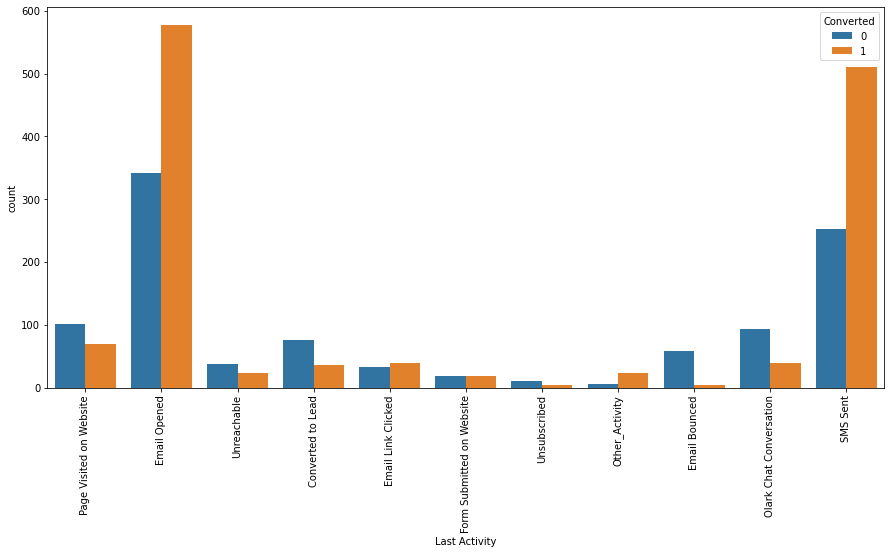

In [54]:
plt.figure(figsize = (15,7))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

In [55]:
lead_data["Country"].describe()

count      2377
unique       23
top       India
freq       2286
Name: Country, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 <a list of 23 Text major ticklabel objects>)

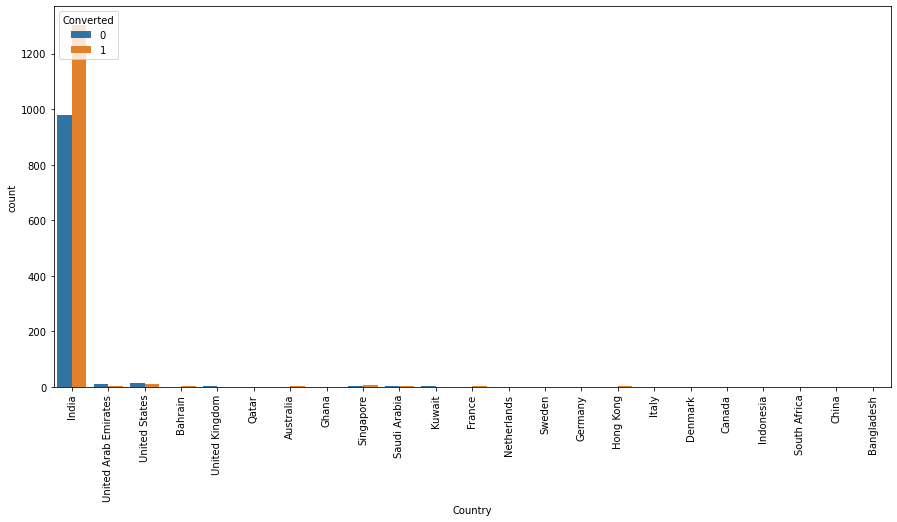

In [56]:
plt.figure(figsize = (15,7))
sns.countplot(x = "Country", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

In [57]:
lead_data.Specialization.describe()

count       2377
unique        19
top       Others
freq         445
Name: Specialization, dtype: object

In [58]:
lead_data['Specialization'] = lead_data['Specialization'].replace(['Others'], 'Other_Specialization')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

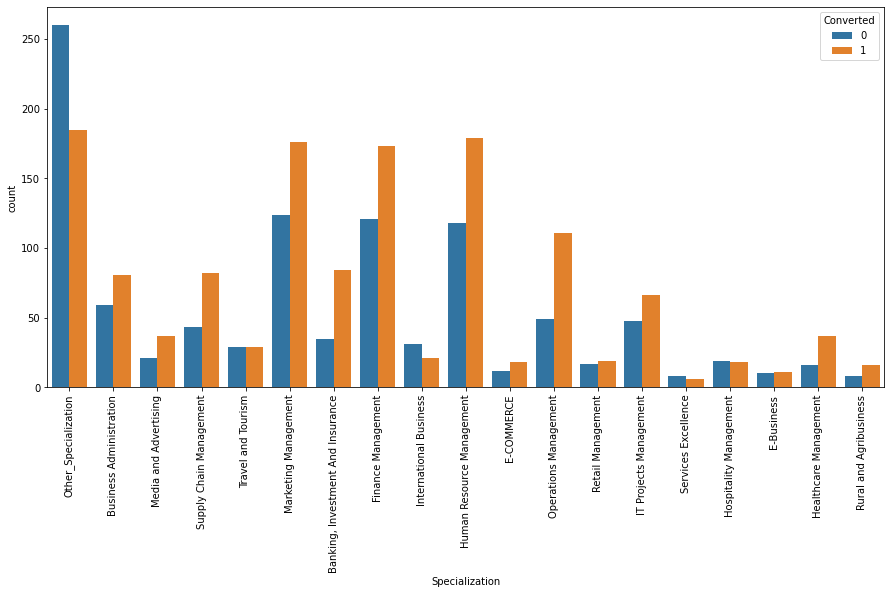

In [59]:
plt.figure(figsize = (15,7))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

In [60]:
lead_data['What is your current occupation'].describe()

count           2377
unique             6
top       Unemployed
freq            1914
Name: What is your current occupation, dtype: object

In [61]:
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(['Other'], 'Other_Occupation')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

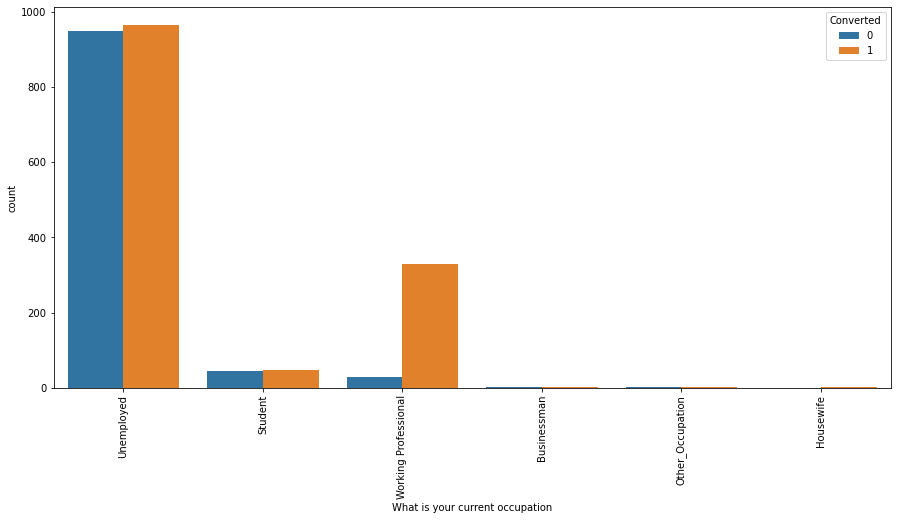

In [62]:
plt.figure(figsize = (15,7))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

In [63]:
lead_data['What matters most to you in choosing a course'].describe()


count                        2377
unique                          2
top       Better Career Prospects
freq                         2376
Name: What matters most to you in choosing a course, dtype: object

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

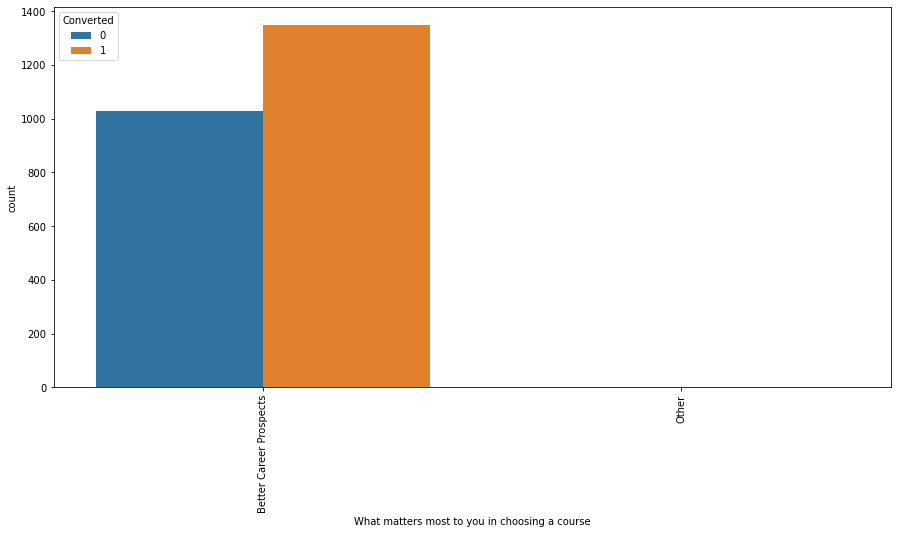

In [64]:
plt.figure(figsize = (15,7))
sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

In [65]:
lead_data['Search'].describe()

count     2377
unique       2
top         No
freq      2374
Name: Search, dtype: object

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

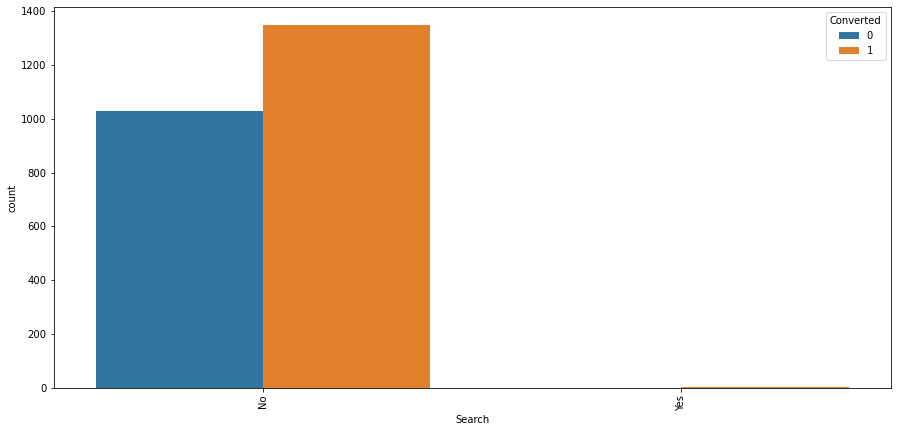

In [66]:
plt.figure(figsize = (15,7))
sns.countplot(x = "Search", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

In [67]:
lead_data['Magazine'].describe()

count     2377
unique       1
top         No
freq      2377
Name: Magazine, dtype: object

In [68]:
lead_data['Newspaper Article'].describe()

count     2377
unique       2
top         No
freq      2376
Name: Newspaper Article, dtype: object

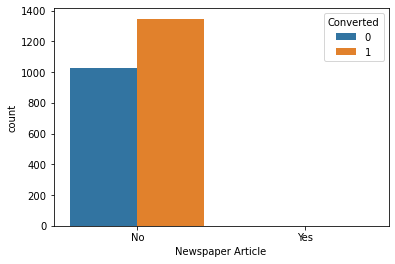

In [69]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_data)

In [70]:
lead_data['X Education Forums'].describe()

count     2377
unique       1
top         No
freq      2377
Name: X Education Forums, dtype: object

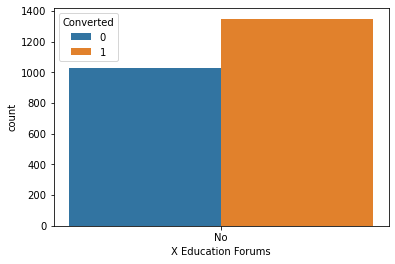

In [71]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_data)

In [72]:
lead_data['Newspaper'].describe()

count     2377
unique       1
top         No
freq      2377
Name: Newspaper, dtype: object

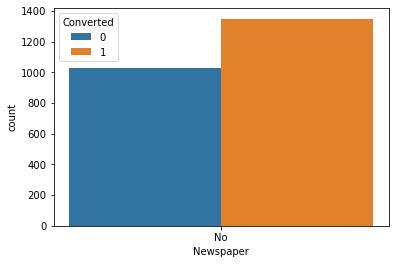

In [73]:
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_data)

In [74]:
lead_data['Digital Advertisement'].describe()

count     2377
unique       2
top         No
freq      2376
Name: Digital Advertisement, dtype: object

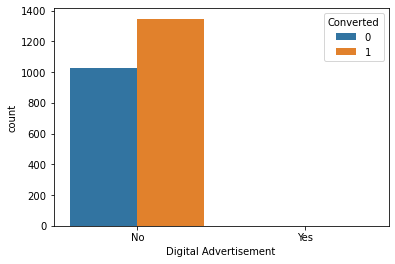

In [75]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_data)

In [76]:
lead_data['Through Recommendations'].describe()

count     2377
unique       2
top         No
freq      2374
Name: Through Recommendations, dtype: object

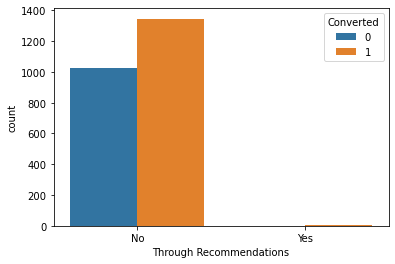

In [77]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_data)

In [78]:
lead_data['Receive More Updates About Our Courses'].describe()

count     2377
unique       1
top         No
freq      2377
Name: Receive More Updates About Our Courses, dtype: object

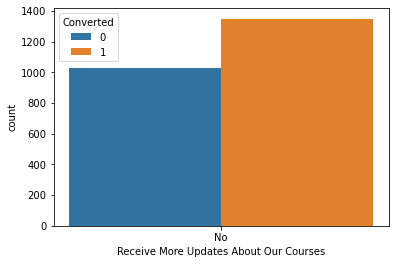

In [79]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_data)

In [80]:
lead_data['Tags'].describe()

count                                    2377
unique                                     24
top       Will revert after reading the email
freq                                     1093
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

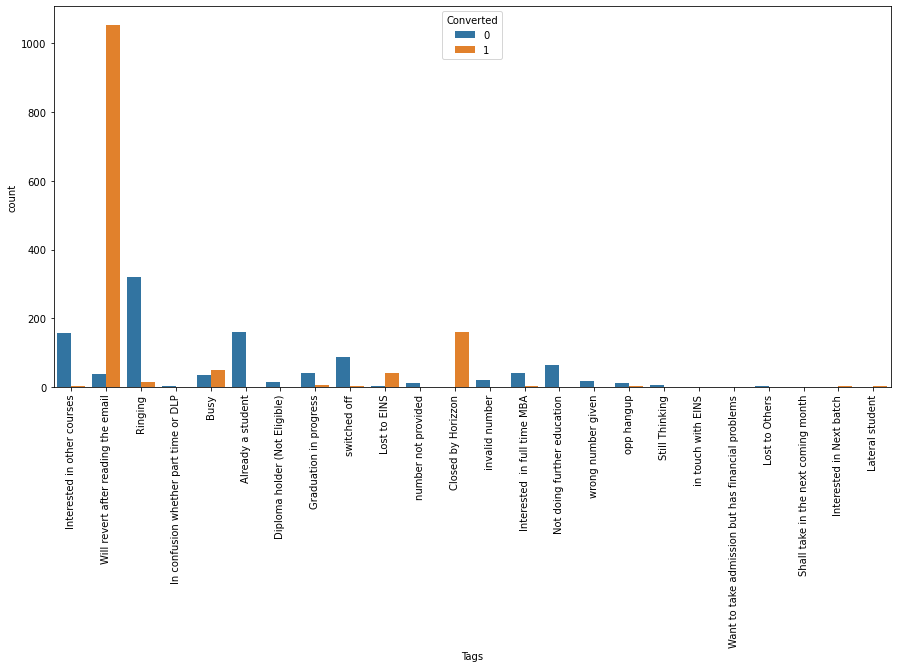

In [81]:
plt.figure(figsize = (15,7))
sns.countplot(x = "Tags", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

In [82]:
lead_data['Tags'] = lead_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
 'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking','Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch','Recognition issue (DEC approval)','Want to take admission but has financial problems','University not recognized'], 'Other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

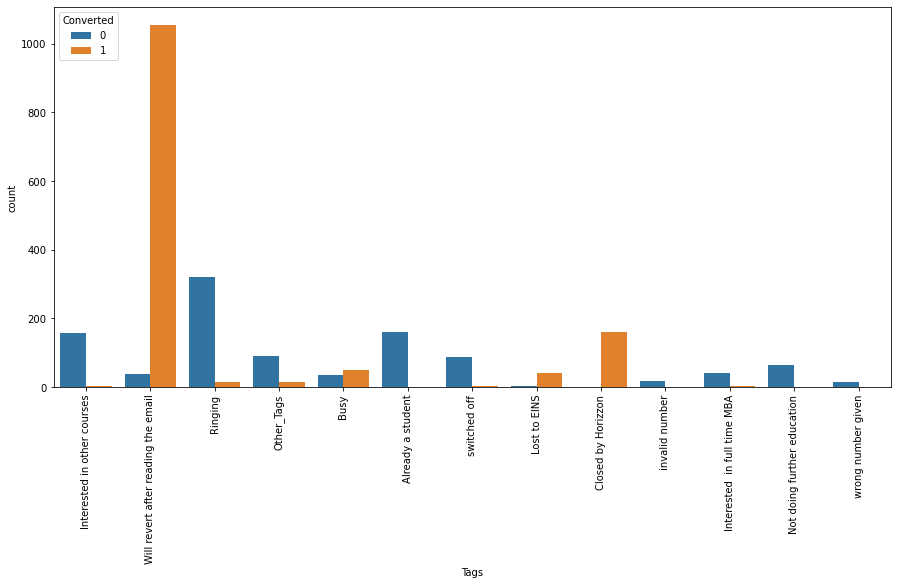

In [83]:
plt.figure(figsize = (15,7))
sns.countplot(x = "Tags", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

In [84]:
lead_data['Lead Quality'].describe()

count         2377
unique           5
top       Might be
freq           819
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

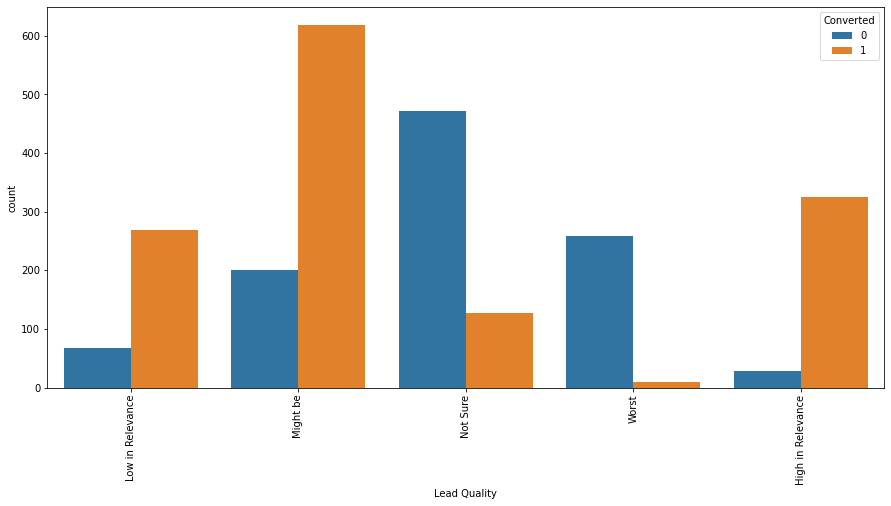

In [85]:
plt.figure(figsize = (15,7))
sns.countplot(x = "Lead Quality", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

In [86]:
lead_data['Update me on Supply Chain Content'].describe()

count     2377
unique       1
top         No
freq      2377
Name: Update me on Supply Chain Content, dtype: object

In [87]:
lead_data['Get updates on DM Content'].describe()

count     2377
unique       1
top         No
freq      2377
Name: Get updates on DM Content, dtype: object

In [88]:
lead_data['I agree to pay the amount through cheque'].describe()

count     2377
unique       1
top         No
freq      2377
Name: I agree to pay the amount through cheque, dtype: object

In [89]:
lead_data['A free copy of Mastering The Interview'].describe()

count     2377
unique       2
top         No
freq      1506
Name: A free copy of Mastering The Interview, dtype: object

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

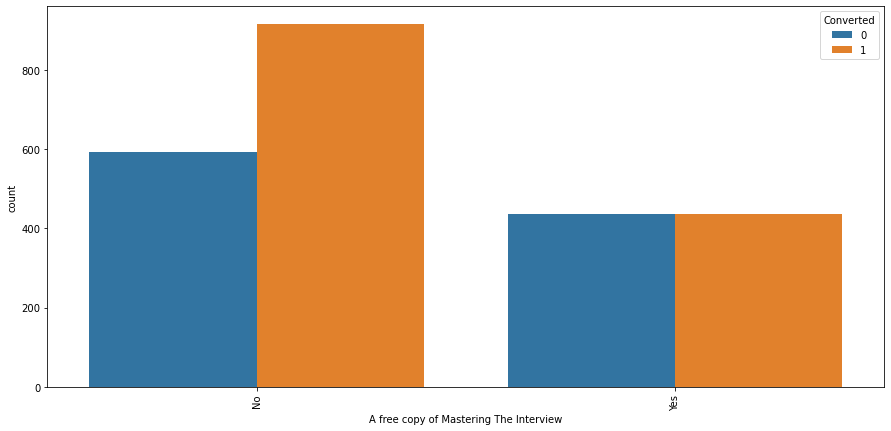

In [90]:
plt.figure(figsize = (15,7))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

In [91]:
lead_data["City"].describe()

count       2377
unique         7
top       Mumbai
freq        1032
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

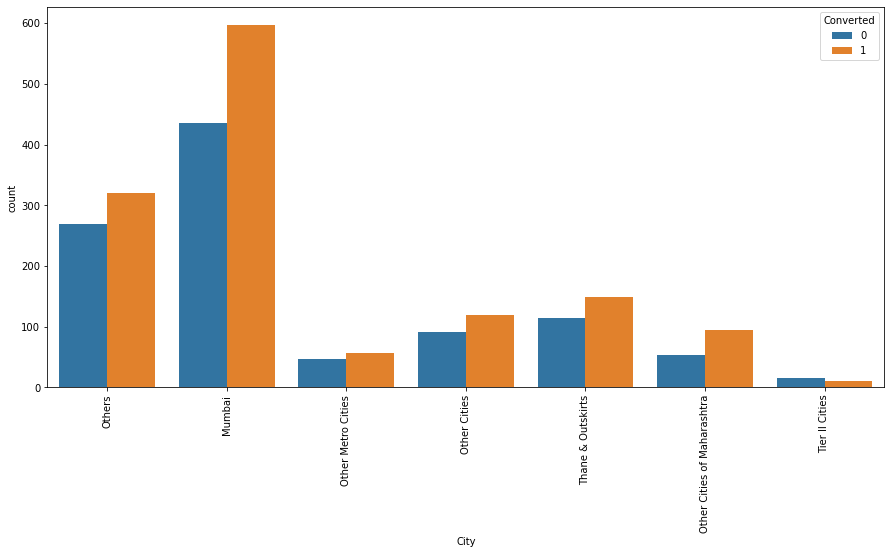

In [92]:
plt.figure(figsize = (15,7))
sns.countplot(x = "City", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

In [93]:
lead_data['Last Notable Activity'].describe()

count         2377
unique          13
top       Modified
freq           912
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

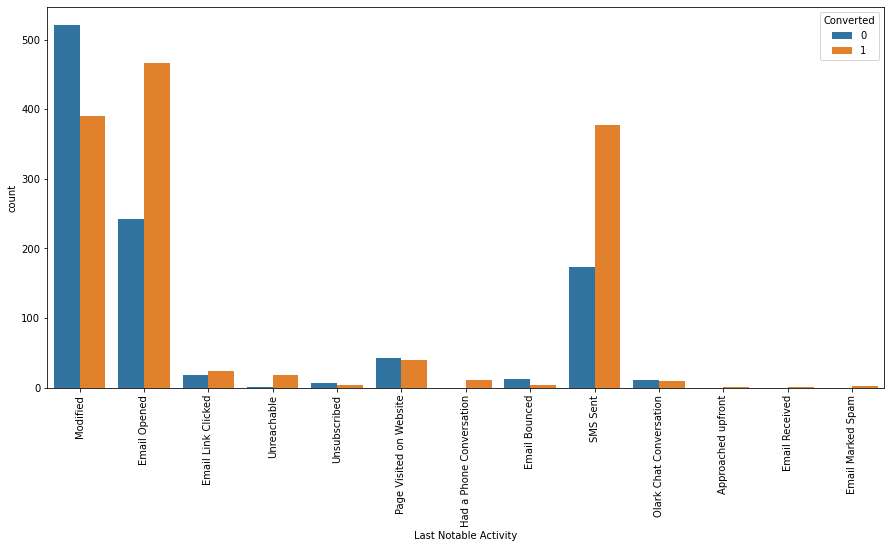

In [94]:
plt.figure(figsize = (15,7))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

In [95]:
lead_data = lead_data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [96]:
lead_data.shape

(2377, 20)

In [99]:
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Others,02.Medium,02.Medium,15.0,15.0,Modified
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,02.Medium,01.High,14.0,20.0,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,02.Medium,01.High,13.0,17.0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,02.Medium,01.High,15.0,18.0,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Unemployed,Will revert after reading the email,Low in Relevance,Mumbai,02.Medium,01.High,14.0,20.0,Modified


# Data Preparation

In [101]:
from sklearn import preprocessing


# encode categorical variables using Label Encoder

# select all categorical variables
lead_data_categorical = lead_data.select_dtypes(include=['object'])
lead_data_categorical.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Others,02.Medium,02.Medium,Modified
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,02.Medium,01.High,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,02.Medium,01.High,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,02.Medium,01.High,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,No,No,Email Opened,Supply Chain Management,Unemployed,Will revert after reading the email,Low in Relevance,Mumbai,02.Medium,01.High,Modified


In [102]:
# apply Label encoder to df_categorical

le = preprocessing.LabelEncoder()
lead_data_categorical = lead_data_categorical.apply(le.fit_transform)
lead_data_categorical.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Last Notable Activity
0,1124,0,3,0,0,7,13,4,4,1,4,1,1,7
2,1327,1,0,0,0,3,1,3,9,2,0,1,0,4
3,108,1,0,0,0,9,11,4,8,3,0,1,0,7
4,490,1,2,0,0,0,13,4,9,2,0,1,0,7
6,1485,1,2,0,0,3,17,4,9,1,0,1,0,7


In [103]:
# concat df_categorical with original df
lead_data= lead_data.drop(lead_data_categorical.columns, axis=1)
lead_data = pd.concat([lead_data, lead_data_categorical], axis=1)
lead_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Last Notable Activity
0,0,0.0,0,0.0,15.0,15.0,1124,0,3,0,0,7,13,4,4,1,4,1,1,7
2,1,2.0,1532,2.0,14.0,20.0,1327,1,0,0,0,3,1,3,9,2,0,1,0,4
3,0,1.0,305,1.0,13.0,17.0,108,1,0,0,0,9,11,4,8,3,0,1,0,7
4,1,2.0,1428,1.0,15.0,18.0,490,1,2,0,0,0,13,4,9,2,0,1,0,7
6,1,2.0,1640,2.0,14.0,20.0,1485,1,2,0,0,3,17,4,9,1,0,1,0,7


In [104]:
# look at column types
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2377 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Converted                        2377 non-null   int64  
 1   TotalVisits                      2377 non-null   float64
 2   Total Time Spent on Website      2377 non-null   int64  
 3   Page Views Per Visit             2377 non-null   float64
 4   Asymmetrique Activity Score      2377 non-null   float64
 5   Asymmetrique Profile Score       2377 non-null   float64
 6   Prospect ID                      2377 non-null   int32  
 7   Lead Origin                      2377 non-null   int32  
 8   Lead Source                      2377 non-null   int32  
 9   Do Not Email                     2377 non-null   int32  
 10  Do Not Call                      2377 non-null   int32  
 11  Last Activity                    2377 non-null   int32  
 12  Specialization      

In [105]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [107]:
# Putting feature variable to X
X = lead_data.drop('Converted',axis=1)

# Putting response variable to y
y = lead_data['Converted']

In [108]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Last Notable Activity
8134,3.0,491,3.0,14.0,18.0,2355,1,4,0,0,8,4,4,8,3,0,1,0,10
8320,3.0,520,3.0,15.0,16.0,1474,1,2,0,0,8,7,4,9,2,3,1,1,10
9017,4.0,1291,4.0,15.0,20.0,2121,1,2,0,0,3,9,4,9,2,0,1,0,4
2181,8.0,262,6.0,13.0,18.0,2069,1,2,0,0,3,1,4,4,0,0,1,0,4
8096,4.0,794,4.0,13.0,18.0,2251,1,2,0,0,8,12,4,9,2,0,1,0,10


In [109]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [110]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       310
           1       0.92      0.93      0.92       404

    accuracy                           0.91       714
   macro avg       0.91      0.91      0.91       714
weighted avg       0.91      0.91      0.91       714



In [111]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[277  33]
 [ 28 376]]
0.9145658263305322


In [1]:
pip install pydotplus

    Running setup.py install for pydotplus: started
    Running setup.py install for pydotplus: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\naidu\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\naidu\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [114]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(lead_data.columns[1:])
features

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Last Notable Activity']

In [115]:
# If you're on windows:
# Specifing path for dot file.
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

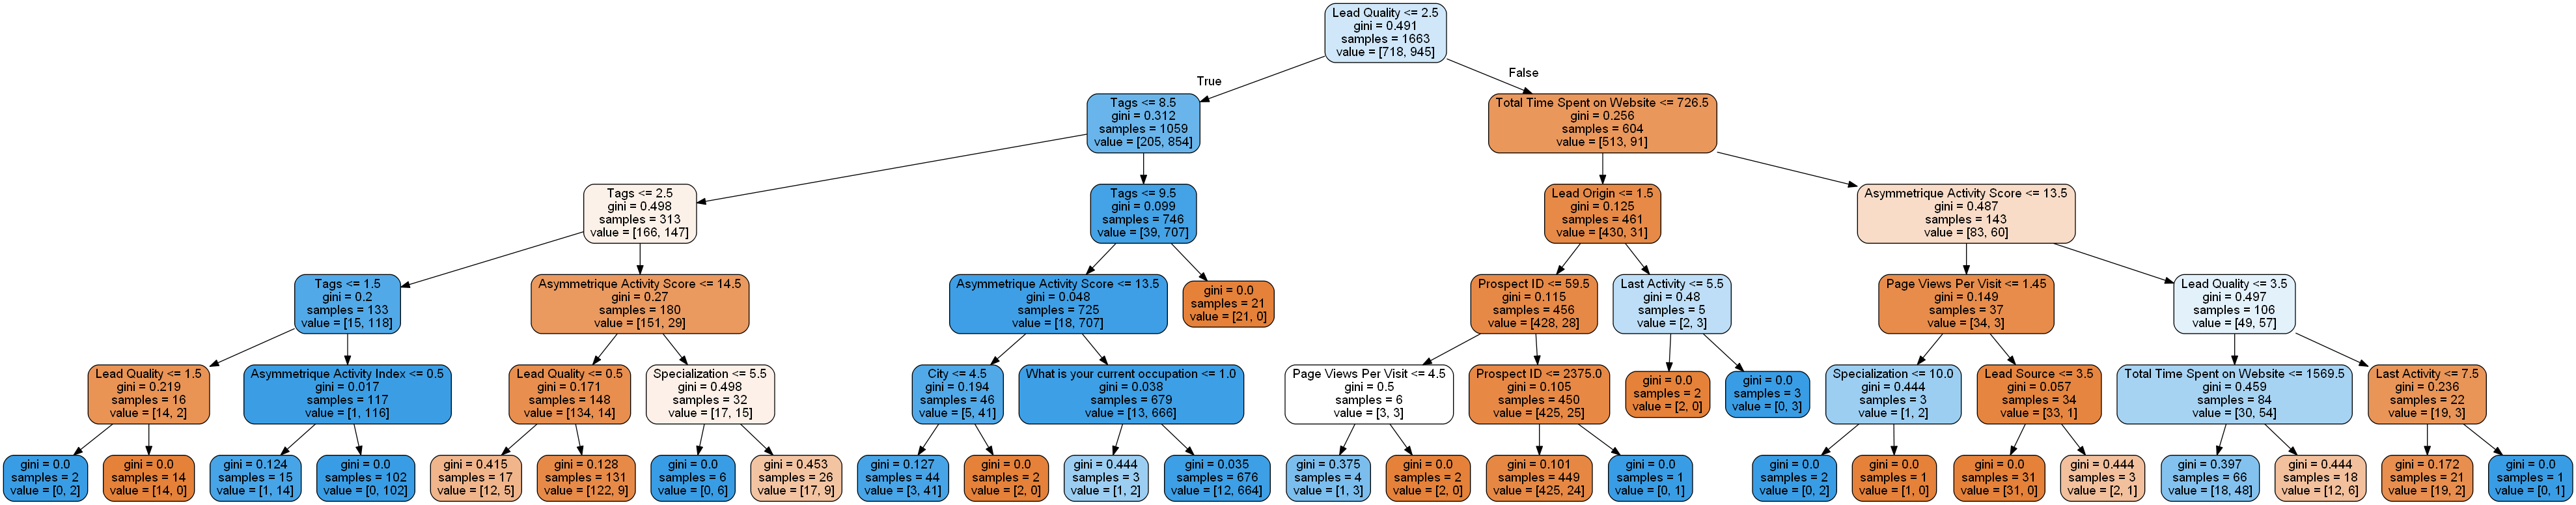

In [116]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Hyperparameter Tuning

The default tree is quite complex, and we need to simplify it by tuning the hyperparameters. 

First, let's understand the parameters in a decision tree. You can read this in the documentation using ```help(DecisionTreeClassifier)```.


- **criterion** (Gini/IG or entropy): It defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes the value “gini”.
- **splitter**: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.
- **max_features**: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.
    - If an integer is inputted then it considers that value as max features at each split.
    - If float value is taken then it shows the percentage of features at each split.
    - If “auto” or “sqrt” is taken then max_features=sqrt(n_features).
    - If “log2” is taken then max_features= log2(n_features).
    - If None, then max_features=n_features. By default, it takes “None” value.
- **max_depth**: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.
- **min_samples_split**: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.
- **min_samples_leaf**: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider - -min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.
- **max_leaf_nodes**: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.
- **min_impurity_split**: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.<br>

# Tuning max_depth

In [118]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds,return_train_score=True,
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
 

In [119]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007781,0.002521,0.003034,0.001296,1,{'max_depth': 1},0.813814,0.822823,0.855856,0.789157,...,0.821992,0.021598,39,0.824060,0.821805,0.813534,0.830203,0.820436,0.822007,0.005398
1,0.008481,0.002744,0.001933,0.002830,2,{'max_depth': 2},0.858859,0.801802,0.861862,0.819277,...,0.833420,0.023331,38,0.827068,0.841353,0.826316,0.836965,0.835462,0.833433,0.005839
2,0.007051,0.007165,0.004202,0.006096,3,{'max_depth': 3},0.900901,0.912913,0.900901,0.882530,...,0.902581,0.011709,37,0.916541,0.913534,0.915789,0.915101,0.912847,0.914763,0.001379
3,0.006834,0.007837,0.000207,0.000415,4,{'max_depth': 4},0.915916,0.927928,0.933934,0.906627,...,0.920013,0.009709,3,0.933083,0.932331,0.930827,0.932382,0.933884,0.932501,0.001010
4,0.016557,0.000799,0.000000,0.000000,5,{'max_depth': 5},0.921922,0.921922,0.933934,0.888554,...,0.917001,0.015147,5,0.940602,0.947368,0.938346,0.948911,0.945905,0.944226,0.004058


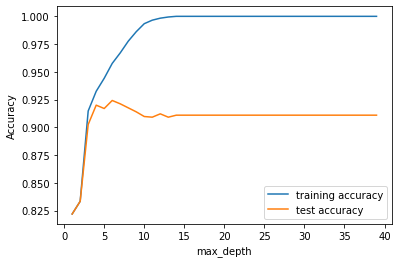

In [120]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Tuning min_samples_leaf

In [121]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds,return_train_score=True,
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             p

In [122]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007572,0.002447,0.001621,0.001557,5,{'min_samples_leaf': 5},0.942943,0.891892,0.936937,0.903614,...,0.916403,0.019930,1,0.954135,0.954135,0.957895,0.960180,0.958678,0.957005,0.002455
1,0.006278,0.001060,0.000801,0.001603,25,{'min_samples_leaf': 25},0.891892,0.921922,0.921922,0.882530,...,0.904978,0.015824,2,0.912782,0.903759,0.909023,0.905334,0.909091,0.907998,0.003168
2,0.007092,0.001989,0.001478,0.001080,45,{'min_samples_leaf': 45},0.882883,0.903904,0.876877,0.882530,...,0.889359,0.010792,5,0.906767,0.896241,0.900752,0.901578,0.902329,0.901533,0.003366
3,0.008514,0.002217,0.002627,0.002002,65,{'min_samples_leaf': 65},0.897898,0.912913,0.897898,0.873494,...,0.895356,0.012647,3,0.894737,0.890977,0.894737,0.900826,0.895567,0.895369,0.003159
4,0.007031,0.003597,0.003969,0.006122,85,{'min_samples_leaf': 85},0.897898,0.912913,0.897898,0.873494,...,0.895356,0.012647,3,0.894737,0.890977,0.894737,0.900826,0.895567,0.895369,0.003159


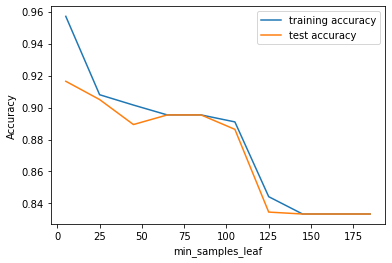

In [123]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# Tuning min_samples_split

In [125]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             

In [126]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008496,0.001755,0.000809,0.001618,5,{'min_samples_split': 5},0.921922,0.900901,0.927928,0.894578,...,0.909789,0.012843,4,0.987970,0.986466,0.989474,0.987228,0.985725,0.987372,0.001291
1,0.008487,0.001564,0.002294,0.001435,25,{'min_samples_split': 25},0.930931,0.906907,0.936937,0.897590,...,0.917003,0.014759,3,0.954887,0.948872,0.948872,0.951165,0.954170,0.951593,0.002549
2,0.007199,0.001826,0.001038,0.001624,45,{'min_samples_split': 45},0.927928,0.909910,0.942943,0.900602,...,0.919409,0.014727,2,0.936842,0.940602,0.942105,0.949662,0.947408,0.943324,0.004642
3,0.010913,0.003297,0.002646,0.002470,65,{'min_samples_split': 65},0.921922,0.918919,0.933934,0.909639,...,0.920015,0.008065,1,0.931579,0.933835,0.931579,0.937641,0.945154,0.935957,0.005104
4,0.012132,0.006321,0.003702,0.006087,85,{'min_samples_split': 85},0.915916,0.906907,0.912913,0.876506,...,0.904978,0.014532,6,0.931579,0.924060,0.924812,0.922615,0.936890,0.927991,0.005413


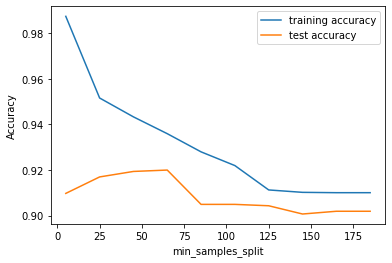

In [127]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# Grid Search to Find Optimal Hyperparameters

In [128]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [129]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007304,0.001708,0.001440,0.001935,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.876877,0.903904,0.876877,0.879518,0.900602,0.887556,0.012084,9
1,0.007780,0.001999,0.001000,0.001550,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.876877,0.903904,0.876877,0.879518,0.900602,0.887556,0.012084,9
2,0.006643,0.001619,0.000528,0.000679,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.897898,0.909910,0.897898,0.873494,0.894578,0.894756,0.011845,1
3,0.005219,0.001537,0.002013,0.001788,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.897898,0.909910,0.897898,0.873494,0.894578,0.894756,0.011845,1
4,0.038315,0.059943,0.001420,0.001513,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.876877,0.903904,0.876877,0.879518,0.900602,0.887556,0.012084,9
5,0.005888,0.001889,0.000498,0.000610,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.876877,0.903904,0.876877,0.879518,0.900602,0.887556,0.012084,9
6,0.006712,0.002464,0.001529,0.001486,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.897898,0.909910,0.897898,0.873494,0.894578,0.894756,0.011845,1
7,0.003567,0.001321,0.001936,0.001796,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.897898,0.909910,0.897898,0.873494,0.894578,0.894756,0.011845,1
8,0.007477,0.002784,0.002662,0.001485,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.876877,0.903904,0.876877,0.873494,0.900602,0.886351,0.013085,13
9,0.005479,0.006697,0.003171,0.006342,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.876877,0.903904,0.876877,0.873494,0.900602,0.886351,0.013085,13


In [130]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8947555989724665
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [131]:
Running the model with best parameters obtained from grid search.

In [132]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [133]:
# accuracy score
clf_gini.score(X_test,y_test)

0.8865546218487395

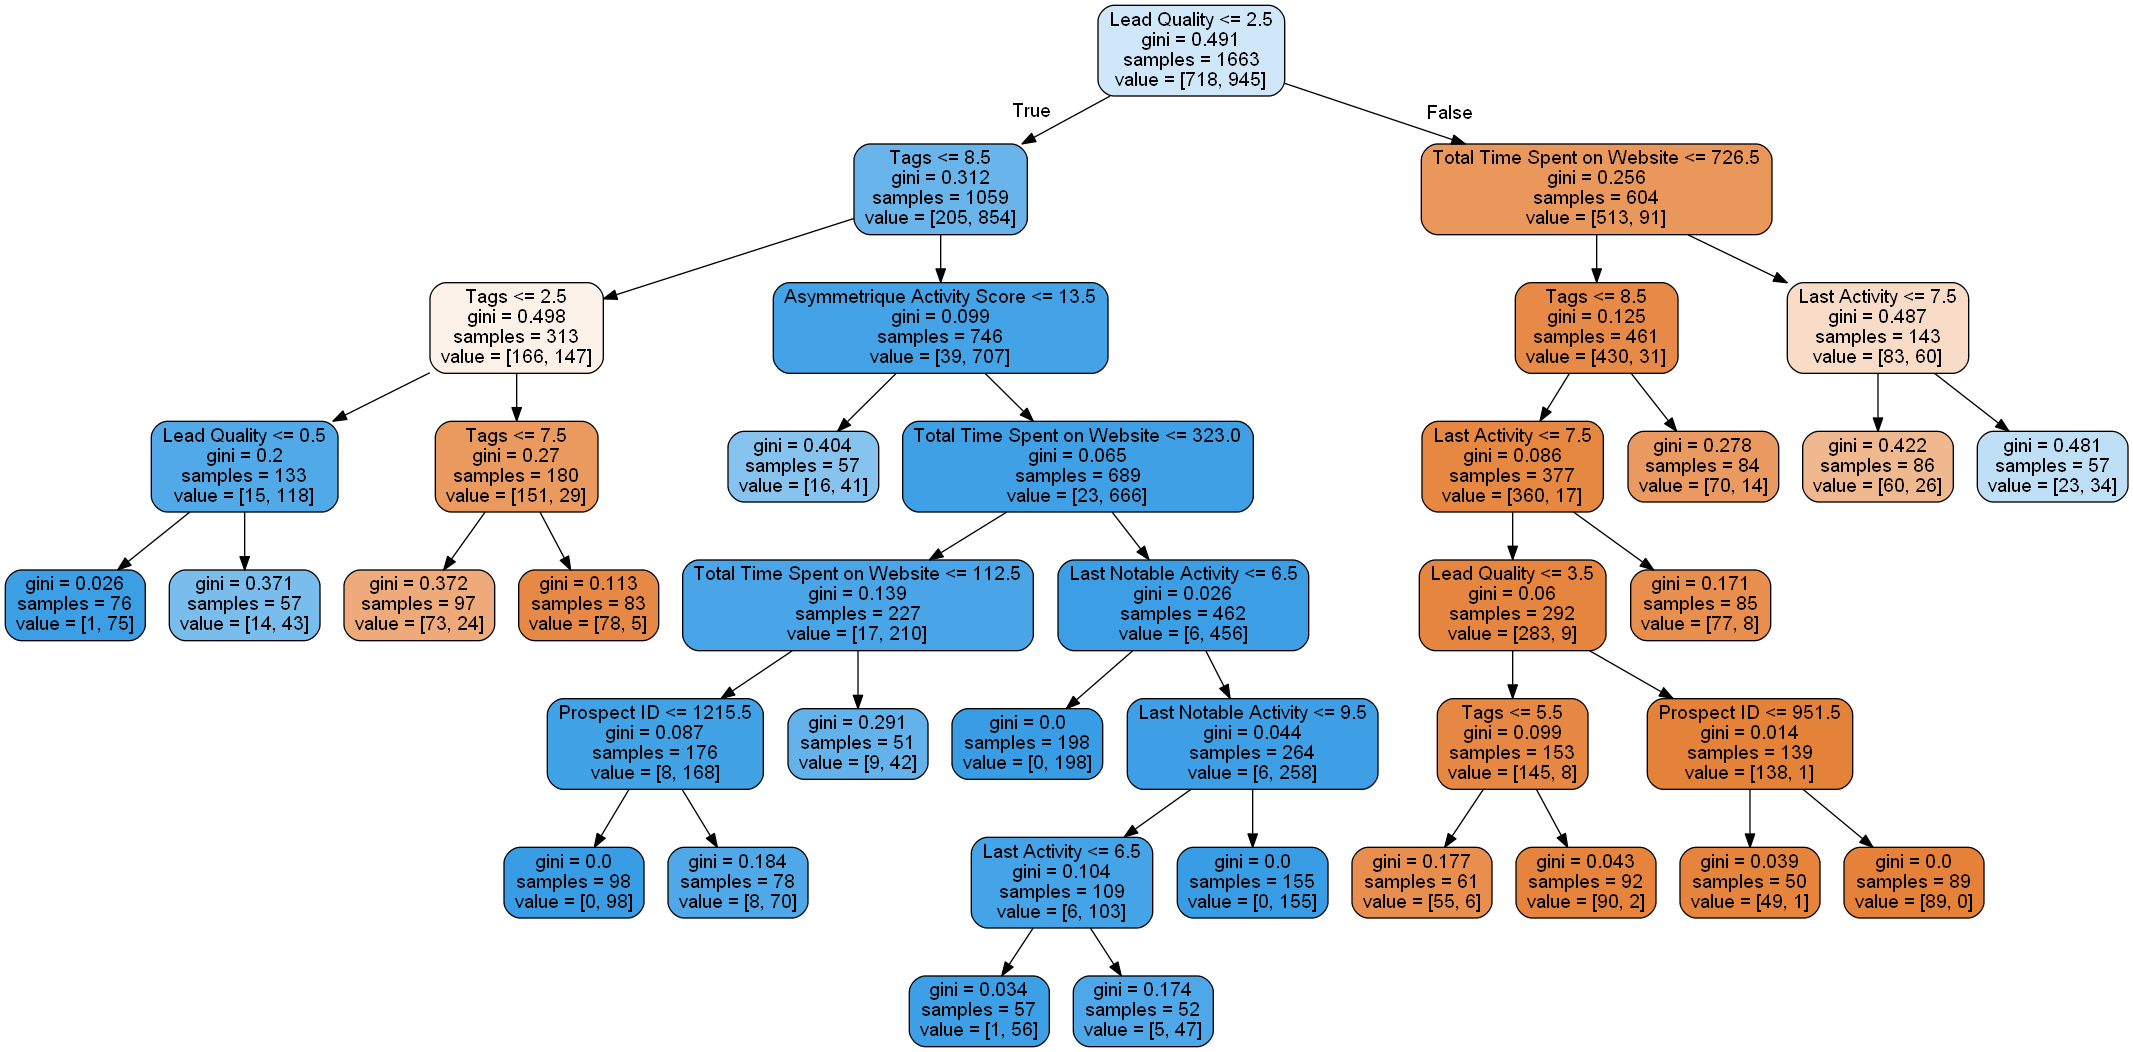

In [134]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [135]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.8865546218487395


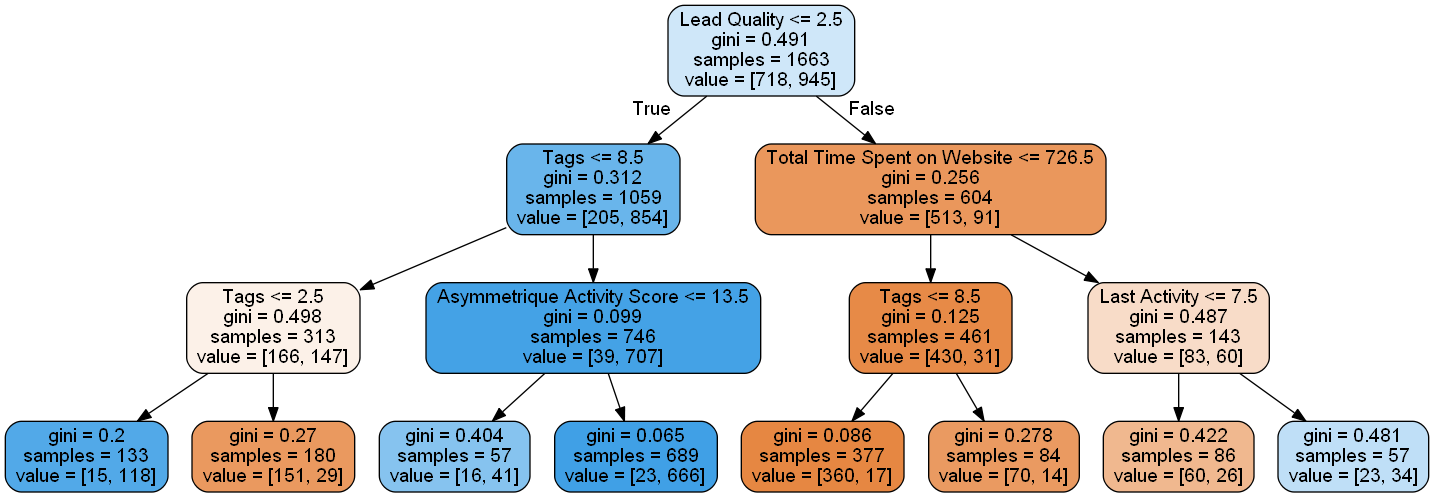

In [136]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [137]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       310
           1       0.90      0.89      0.90       404

    accuracy                           0.89       714
   macro avg       0.88      0.89      0.88       714
weighted avg       0.89      0.89      0.89       714



In [138]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[272  38]
 [ 43 361]]
